In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class layer:
    def __init__(self, in_size, out_size):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size], mean=0.0, stddev=0.01))
#         self.b = tf.Variable(tf.zeros([1,out_size]))
#         self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
        self.b = tf.Variable(tf.random_normal([1, out_size], mean=0.0, stddev=0.01))
    
        
    def output(self, inputs, activation_function=None):
        if activation_function == None:
            return tf.matmul(inputs, self.W) + self.b
        else :
            return activation_function(tf.matmul(inputs, self.W) + self.b)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
batch_size = 512
g_dim = 256

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x_d = tf.placeholder(tf.float32, shape=[None, 784])
x_g = tf.placeholder(tf.float32, shape=[None, g_dim])

In [5]:
d_l1 = layer(784, g_dim)
d_l2 = layer(g_dim, 1)

g_l1 = layer(g_dim, 512)
g_l2 = layer(512, 784)

var_d = [d_l1.W, d_l1.b, d_l2.W, d_l2.b]
var_g = [g_l1.W, g_l1.b, g_l2.W, g_l2.b]

In [6]:
def discriminator(x):
    h_d1 = d_l1.output(x, tf.nn.relu)
    h_d2 = d_l2.output(h_d1, tf.nn.sigmoid)
    return h_d2

def generator(x):
    h_g1 = g_l1.output(x, tf.nn.relu)
    h_g2 = g_l2.output(h_g1, tf.nn.sigmoid)
    return h_g2

def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

g_sample = generator(x_g)
d_real = discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real)+tf.log(1-d_fake))    # d_real, 1-d_fake bigger -> better
g_loss = -tf.reduce_mean(tf.log(d_fake))    # d_fake bigger -> better


In [7]:
d_optimizer = tf.train.AdamOptimizer(0.00001).minimize(d_loss, var_list = var_d)
# d_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(d_loss, var_list = var_d)

g_optimizer = tf.train.AdamOptimizer(0.00001).minimize(g_loss, var_list = var_g)
# g_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(g_loss, var_list = var_g)


In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(20001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')


InternalError: Blas GEMM launch failed : a.shape=(512, 784), b.shape=(784, 256), m=512, n=256, k=784
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_3, Variable/read)]]

Caused by op u'MatMul_2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-55555fe8a57f>", line 15, in <module>
    d_real = discriminator(x_d)
  File "<ipython-input-6-55555fe8a57f>", line 2, in discriminator
    h_d1 = d_l1.output(x, tf.nn.relu)
  File "<ipython-input-2-bcbdbd8e7e50>", line 14, in output
    return activation_function(tf.matmul(inputs, self.W) + self.b)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 2437, in _mat_mul
    name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(512, 784), b.shape=(784, 256), m=512, n=256, k=784
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_3, Variable/read)]]


In [84]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1. and g_loss_train<1. :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.0979801  g-loss: 4.05515
step: 1000  d-loss: 0.253812  g-loss: 3.1519
step: 2000  d-loss: 0.0978541  g-loss: 4.16266
step: 3000  d-loss: 0.163838  g-loss: 3.737
step: 4000  d-loss: 0.1641  g-loss: 3.92323
step: 5000  d-loss: 0.155789  g-loss: 3.82971
step: 6000  d-loss: 0.176131  g-loss: 3.68119
step: 7000  d-loss: 0.392672  g-loss: 2.71527
step: 8000  d-loss: 0.107805  g-loss: 4.27958
step: 9000  d-loss: 0.188013  g-loss: 3.88611
step: 10000  d-loss: 0.151076  g-loss: 3.97532
step: 11000  d-loss: 0.067372  g-loss: 4.94488
step: 12000  d-loss: 0.179406  g-loss: 4.20443
step: 13000  d-loss: 0.0810326  g-loss: 4.9801
step: 14000  d-loss: 0.104045  g-loss: 4.22951
step: 15000  d-loss: 0.159695  g-loss: 4.03291
step: 16000  d-loss: 0.119563  g-loss: 4.43204
step: 17000  d-loss: 0.0843017  g-loss: 4.66491
step: 18000  d-loss: 0.180044  g-loss: 3.97319
step: 19000  d-loss: 0.128668  g-loss: 4.3249
step: 20000  d-loss: 0.153983  g-loss: 4.52136
step: 21000  d-loss: 0.143626

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

In [85]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1. and g_loss_train<1. :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: nan  g-loss: nan
step: 1000  d-loss: nan  g-loss: nan
step: 2000  d-loss: nan  g-loss: nan
step: 3000  d-loss: nan  g-loss: nan
step: 4000  d-loss: nan  g-loss: nan
step: 5000  d-loss: nan  g-loss: nan
step: 6000  d-loss: nan  g-loss: nan
step: 7000  d-loss: nan  g-loss: nan
step: 8000  d-loss: nan  g-loss: nan
step: 9000  d-loss: nan  g-loss: nan
step: 10000  d-loss: nan  g-loss: nan
step: 11000  d-loss: nan  g-loss: nan
step: 12000  d-loss: nan  g-loss: nan
step: 13000  d-loss: nan  g-loss: nan
step: 14000  d-loss: nan  g-loss: nan
step: 15000  d-loss: nan  g-loss: nan
step: 16000  d-loss: nan  g-loss: nan
step: 17000  d-loss: nan  g-loss: nan
step: 18000  d-loss: nan  g-loss: nan
step: 19000  d-loss: nan  g-loss: nan
step: 20000  d-loss: nan  g-loss: nan
step: 21000  d-loss: nan  g-loss: nan
step: 22000  d-loss: nan  g-loss: nan
step: 23000  d-loss: nan  g-loss: nan
step: 24000  d-loss: nan  g-loss: nan
step: 25000  d-loss: nan  g-loss: nan
step: 26000  d-loss: nan 

KeyboardInterrupt: 

In [ ]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1.5 and g_loss_train<1.5 :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

In [55]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: nan  g-loss: nan
step: 1000  d-loss: nan  g-loss: nan
step: 2000  d-loss: nan  g-loss: nan
step: 3000  d-loss: nan  g-loss: nan
step: 4000  d-loss: nan  g-loss: nan
step: 5000  d-loss: nan  g-loss: nan
step: 6000  d-loss: nan  g-loss: nan
step: 7000  d-loss: nan  g-loss: nan
step: 8000  d-loss: nan  g-loss: nan
step: 9000  d-loss: nan  g-loss: nan
step: 10000  d-loss: nan  g-loss: nan
step: 11000  d-loss: nan  g-loss: nan
step: 12000  d-loss: nan  g-loss: nan
step: 13000  d-loss: nan  g-loss: nan
step: 14000  d-loss: nan  g-loss: nan
step: 15000  d-loss: nan  g-loss: nan
step: 16000  d-loss: nan  g-loss: nan
step: 17000  d-loss: nan  g-loss: nan
step: 18000  d-loss: nan  g-loss: nan
step: 19000  d-loss: nan  g-loss: nan
step: 20000  d-loss: nan  g-loss: nan
step: 21000  d-loss: nan  g-loss: nan
step: 22000  d-loss: nan  g-loss: nan
step: 23000  d-loss: nan  g-loss: nan
step: 24000  d-loss: nan  g-loss: nan
step: 25000  d-loss: nan  g-loss: nan
step: 26000  d-loss: nan 

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

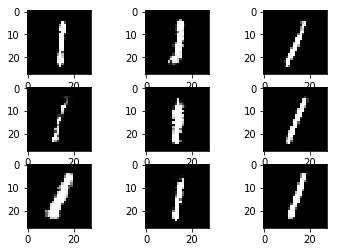

In [76]:
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[335+i*3+j], cmap='gray')